In [10]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"nisarg40soni","key":"4d02fb3f78109fcf611378b2bb4ebaec"}'}

In [11]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Dec  3 07:42 kaggle.json


In [12]:
!pip install -q kaggle

In [13]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [14]:
!kaggle datasets download -d sudalairajkumar/covid19-in-india

covid19-in-india.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
!ls

 covid_19_india.csv	      'kaggle (1).json'   StatewiseTestingDetails.csv
 covid19-in-india.zip	       kaggle.json
 covid_vaccine_statewise.csv   sample_data


In [16]:
!unzip covid19-in-india.zip

Archive:  covid19-in-india.zip
replace StatewiseTestingDetails.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: StatewiseTestingDetails.csv  
replace covid_19_india.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: covid_19_india.csv      
replace covid_vaccine_statewise.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: covid_vaccine_statewise.csv  


In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys
import plotly
import plotly.express as px
import plotly.graph_objects as go

#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')

In [19]:
state_df = pd.read_csv('StatewiseTestingDetails.csv')
country_df = pd.read_csv('covid_19_india.csv')
vaccine_df = pd.read_csv('covid_vaccine_statewise.csv')

In [20]:
#convert the Date feature to Date&time datatype
state_df['Date'] = pd.to_datetime(state_df['Date'])
country_df['Date'] = pd.to_datetime(country_df['Date'])
#vaccine_df['Date'] = pd.to_datetime(vaccine_df['Date'])

# first few rows
state_df[state_df['State']=='Tamil Nadu'].head()

,Date,State,TotalSamples,Negative,Positive
13505,2020-04-03,Tamil Nadu,3684.0,2789,411.0
13506,2020-04-08,Tamil Nadu,5305.0,4414,690.0
13507,2020-04-09,Tamil Nadu,7267.0,5824,834.0
13508,2020-04-10,Tamil Nadu,8410.0,6838,911.0
13509,2020-04-11,Tamil Nadu,9842.0,7779,969.0


In [21]:
country_df[((country_df['Date']=='2020-04-04')&(country_df['State/UnionTerritory']=='Tamil Nadu'))]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
643,644,2020-04-04,6:00 PM,Tamil Nadu,-,-,6,2,411


In [22]:
print("Minimum date :",country_df['Date'].min())
print("Maximum date :",country_df['Date'].max())

Minimum date : 2020-01-30 00:00:00
Maximum date : 2021-08-11 00:00:00


In [23]:
#Copying the country_df data to df for easy reference
df=country_df.copy()

In [24]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [25]:
df.shape

(18110, 9)

In [26]:
df_confirmed_india=df.groupby('Date')['Confirmed'].sum().reset_index()
df_cured_india=df.groupby('Date')['Cured'].sum().reset_index()
df_death_india=df.groupby('Date')['Deaths'].sum().reset_index()

df_confirmed_india

,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
555,2021-08-07,31895385
556,2021-08-08,31934455
557,2021-08-09,31969954
558,2021-08-10,31998158


In [27]:
df_cured_india

,Date,Cured
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
...,...,...
555,2021-08-07,31055861
556,2021-08-08,31099771
557,2021-08-09,31139457
558,2021-08-10,31180968


In [28]:
df_death_india

,Date,Deaths
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
...,...,...
555,2021-08-07,427371
556,2021-08-08,427862
557,2021-08-09,428309
558,2021-08-10,428682


In [29]:
#Check data types of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18110 non-null  int64         
 1   Date                      18110 non-null  datetime64[ns]
 2   Time                      18110 non-null  object        
 3   State/UnionTerritory      18110 non-null  object        
 4   ConfirmedIndianNational   18110 non-null  object        
 5   ConfirmedForeignNational  18110 non-null  object        
 6   Cured                     18110 non-null  int64         
 7   Deaths                    18110 non-null  int64         
 8   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.2+ MB


In [30]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [31]:
print("The Confirmed Cases are",df_confirmed_india.Confirmed.max())
print("The Recovered Cases are",df_cured_india.Cured.max())
print("The Deaths Cases are",df_death_india.Deaths.max())

The Confirmed Cases are 32036511
The Recovered Cases are 31220981
The Deaths Cases are 429179


In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_confirmed_india['Date'], y = df_confirmed_india['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_death_india['Date'], y = df_death_india['Deaths'], mode='lines+markers',name='Total Deaths',line=dict(color='Red', width=2)))
fig.update_layout(title_text='Trend of Death Cases in India',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [34]:
state_cases = df.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

state_cases['Active'] = state_cases['Confirmed'] - ( state_cases['Deaths'] + state_cases['Cured'] )

state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)

state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)

state_cases

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
0,Andaman and Nicobar Islands,7548,129,7412,7,1.71,98.20
1,Andhra Pradesh,1985182,13564,1952736,18882,0.68,98.37
2,Arunachal Pradesh,50605,248,47821,2536,0.49,94.50
3,Assam,576149,5420,559684,11045,0.94,97.14
4,Bihar,725279,9646,715352,281,1.33,98.63
5,Bihar****,715730,9452,701234,5044,1.32,97.97
6,Cases being reassigned to states,9265,0,0,9265,0.00,0.00
7,Chandigarh,61992,811,61150,31,1.31,98.64
8,Chhattisgarh,1003356,13544,988189,1623,1.35,98.49
9,Dadra and Nagar Haveli,10377,4,10261,112,0.04,98.88


In [35]:
state_cases['State/UnionTerritory'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Bihar****',
       'Cases being reassigned to states', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Himanchal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karanataka', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
       'Madhya Pradesh', 'Madhya Pradesh***', 'Maharashtra',
       'Maharashtra***', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Telengana', 'Tripura', 'Unassigned',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [36]:
df['Active']=df['Confirmed'] - ( df['Cured']+ df['Deaths'] )

In [37]:
x = state_cases.groupby('State/UnionTerritory')['Active'].sum().sort_values(ascending=False)
x.to_frame().style.background_gradient(cmap='Reds')

,Active
State/UnionTerritory,
Kerala,172505
Maharashtra***,97932
Telengana,78888
Maharashtra,69565
Karanataka,27550
Karnataka,22702
Tamil Nadu,20363
Andhra Pradesh,18882
Mizoram,12427


In [38]:
state_wise_cases=state_cases.sort_values('Confirmed',ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Oranges',subset=["Active"])\
                        .background_gradient(cmap='RdYlBu',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='BuPu',subset=["Cure Rate (per 100)"])

state_wise_cases

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
27,Maharashtra,6363442,134201,6159676,69565,2.110000,96.800000
28,Maharashtra***,6229596,130753,6000911,97932,2.100000,96.330000
22,Kerala,3586693,18004,3396184,172505,0.500000,94.690000
21,Karnataka,2921049,36848,2861499,22702,1.260000,97.960000
20,Karanataka,2885238,36197,2821491,27550,1.250000,97.790000
38,Tamil Nadu,2579130,34367,2524400,20363,1.330000,97.880000
1,Andhra Pradesh,1985182,13564,1952736,18882,0.680000,98.370000
43,Uttar Pradesh,1708812,22775,1685492,545,1.330000,98.640000
45,West Bengal,1534999,18252,1506532,10215,1.190000,98.150000
12,Delhi,1436852,25068,1411280,504,1.740000,98.220000


In [39]:
df['Fatality-Ratio'] = df['Deaths']/df['Confirmed']

df['Fatality-Ratio']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
18105    0.005891
18106    0.009583
18107    0.021515
18108    0.013328
18109    0.011891
Name: Fatality-Ratio, Length: 18110, dtype: float64

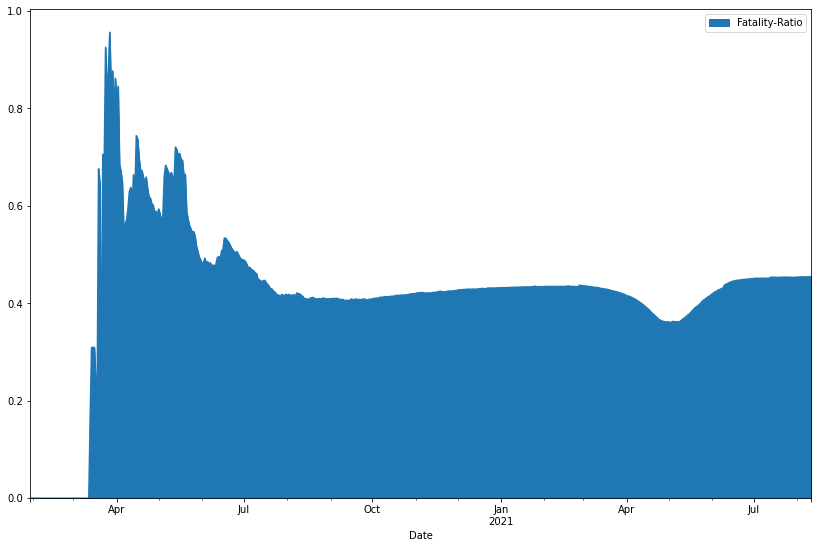

In [40]:
fatality_year=df.groupby('Date')['Fatality-Ratio'].sum().reset_index()

fatality_year.plot(kind='area',x='Date',y='Fatality-Ratio',figsize=(14, 9))

In [41]:
#Time is not required as it doesnt make much difference
df.drop(['Time'],axis=1, inplace=True)
df.drop(['ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)

In [42]:
df[df['State/UnionTerritory']=='Tamil Nadu'].tail()

,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active,Fatality-Ratio
17960,17961,2021-08-07,Tamil Nadu,2516938,34260,2571383,20185,0.013324
17996,17997,2021-08-08,Tamil Nadu,2518777,34289,2573352,20286,0.013325
18032,18033,2021-08-09,Tamil Nadu,2520584,34317,2575308,20407,0.013325
18068,18069,2021-08-10,Tamil Nadu,2522470,34340,2577237,20427,0.013324
18104,18105,2021-08-11,Tamil Nadu,2524400,34367,2579130,20363,0.013325


In [43]:
median_states=df[df['State/UnionTerritory'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])]
#median_states.groupby(by=['State/UnionTerritory']).median().style.bar(['Active_cases'])

median_states.groupby(by=['State/UnionTerritory']).median().style.bar(['Cured'])

,Sno,Cured,Deaths,Confirmed,Active,Fatality-Ratio
State/UnionTerritory,,,,,,
Delhi,8617.500000,463755.500000,8100.000000,513934.000000,10110.000000,0.017168
Kerala,8065.500000,368848.000000,1573.000000,455388.000000,46928.500000,0.003979
Maharashtra,8733.500000,1652928.500000,46638.000000,1782284.500000,96548.000000,0.025720
Tamil Nadu,8726.000000,745848.000000,11605.000000,769995.000000,20407.000000,0.014365


In [44]:
df_testing=pd.read_csv('StatewiseTestingDetails.csv')

In [45]:
df_testing.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [46]:
# States with Total Sample collections
df_sample=df_testing.groupby('State')['TotalSamples'].max().sort_values(ascending=False).reset_index()

In [47]:
df_sample.head()

,State,TotalSamples
0,Uttar Pradesh,67897856.0
1,Maharashtra,49905065.0
2,Karnataka,40104915.0
3,Tamil Nadu,39002757.0
4,Bihar,38820518.0


In [48]:
df_positive=df_testing.groupby('State')['Positive'].max().sort_values(ascending=False).reset_index()
df_vaccine=pd.read_csv('covid_vaccine_statewise.csv')

In [49]:
df_vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [50]:
male = df_vaccine["Male(Individuals Vaccinated)"].max() 
female = df_vaccine["Female(Individuals Vaccinated)"].max()  
trans = df_vaccine["Transgender(Individuals Vaccinated)"].max()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19")

In [51]:
df_vaccine.columns

Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')

In [52]:
Covaxin = df_vaccine[" Covaxin (Doses Administered)"].max() 
Covishield = df_vaccine["CoviShield (Doses Administered)"].max()  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxin,Covishield],title="Covaxin and Covishield Vaccination")

In [53]:
Doses = df_vaccine["Total Doses Administered"].max() 
Vaccinated = df_vaccine["Total Individuals Vaccinated"].max()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [54]:
df_Odisha=df_vaccine[df_vaccine['State']=='Odisha']
df_Maharashtra=df_vaccine[df_vaccine['State']=='Maharashtra']

In [55]:
Doses = df_Odisha["Total Doses Administered"].max() 
Vaccinated = df_Odisha["Total Individuals Vaccinated"].max()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [56]:
maxDoses = df_Maharashtra["Total Doses Administered"].max() 
Vaccinated = df_Maharashtra["Total Individuals Vaccinated"].max()  
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [57]:
df_confirmed_india.columns = ['ds','y']
df_confirmed_india['ds'] = pd.to_datetime(df_confirmed_india['ds'])

In [58]:
df_confirmed_india

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
555,2021-08-07,31895385
556,2021-08-08,31934455
557,2021-08-09,31969954
558,2021-08-10,31998158


In [59]:
from fbprophet import Prophet

In [60]:
m = Prophet()
m.fit(df_confirmed_india)
future = m.make_future_dataframe(periods=21)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
576,2021-08-28
577,2021-08-29
578,2021-08-30
579,2021-08-31
580,2021-09-01


In [61]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
576,2021-08-28,3.902852e+07,3.737117e+07,4.068090e+07,3.893349e+07,3.911647e+07,10700.222622,10700.222622,10700.222622,10700.222622,10700.222622,10700.222622,0.0,0.0,0.0,3.903922e+07
577,2021-08-29,3.919392e+07,3.766849e+07,4.086484e+07,3.908655e+07,3.929291e+07,4562.834651,4562.834651,4562.834651,4562.834651,4562.834651,4562.834651,0.0,0.0,0.0,3.919848e+07
578,2021-08-30,3.935931e+07,3.774674e+07,4.095251e+07,3.924191e+07,3.947043e+07,-4188.545142,-4188.545142,-4188.545142,-4188.545142,-4188.545142,-4188.545142,0.0,0.0,0.0,3.935512e+07
579,2021-08-31,3.952471e+07,3.789617e+07,4.111363e+07,3.939481e+07,3.964815e+07,-19314.249645,-19314.249645,-19314.249645,-19314.249645,-19314.249645,-19314.249645,0.0,0.0,0.0,3.950539e+07
580,2021-09-01,3.969011e+07,3.805897e+07,4.138575e+07,3.954948e+07,3.982420e+07,-28914.547406,-28914.547406,-28914.547406,-28914.547406,-28914.547406,-28914.547406,0.0,0.0,0.0,3.966119e+07


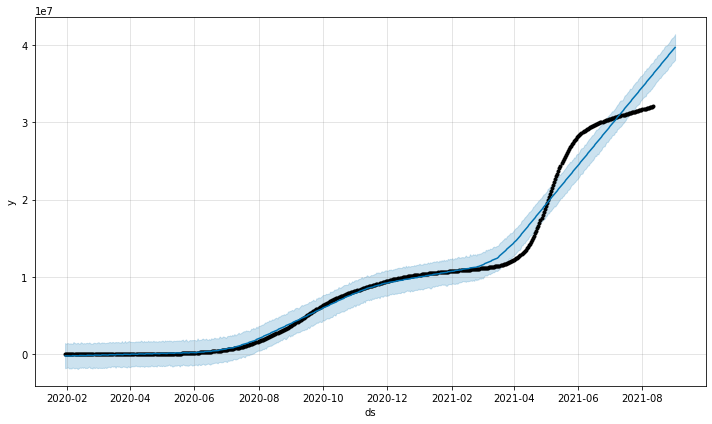

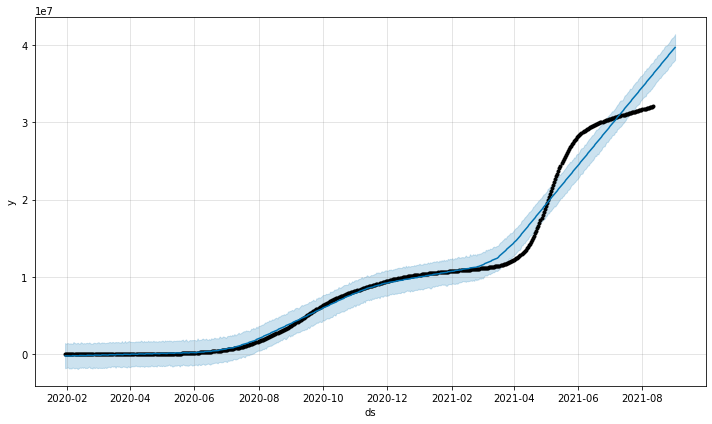

In [62]:
m.plot(forecast)

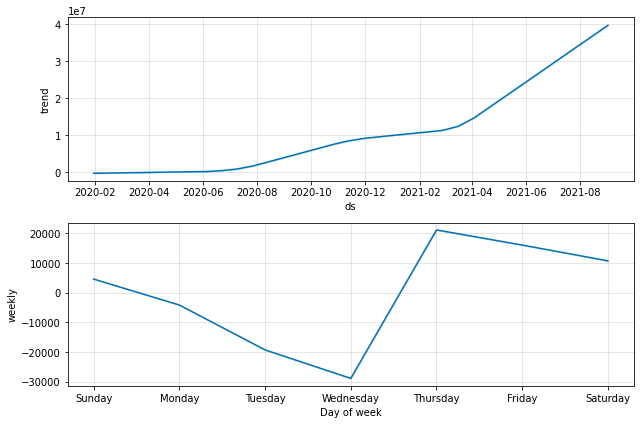

In [63]:
confirmed_forecast_plot =m.plot_components(forecast)

In [64]:
df_death_india.columns = ['ds','y']
df_death_india['ds'] = pd.to_datetime(df_death_india['ds'])

In [65]:
df_death_india

,ds,y
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
...,...,...
555,2021-08-07,427371
556,2021-08-08,427862
557,2021-08-09,428309
558,2021-08-10,428682


In [66]:
model = Prophet()
model.fit(df_death_india)
future = model.make_future_dataframe(periods=14)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
569,2021-08-21
570,2021-08-22
571,2021-08-23
572,2021-08-24
573,2021-08-25


In [67]:
prediction = model.predict(future)
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
569,2021-08-21,499443.211611,484484.134385,513502.272011,499099.876101,499779.243223,144.712080,144.712080,144.712080,144.712080,144.712080,144.712080,0.0,0.0,0.0,499587.923691
570,2021-08-22,501819.699699,487027.989008,515333.522114,501352.540040,502335.951018,38.279736,38.279736,38.279736,38.279736,38.279736,38.279736,0.0,0.0,0.0,501857.979434
571,2021-08-23,504196.187786,489705.747099,518657.554772,503554.556703,504827.706677,-93.577230,-93.577230,-93.577230,-93.577230,-93.577230,-93.577230,0.0,0.0,0.0,504102.610556
572,2021-08-24,506572.675873,492222.992704,521281.036618,505801.756260,507380.101415,-260.499711,-260.499711,-260.499711,-260.499711,-260.499711,-260.499711,0.0,0.0,0.0,506312.176163
573,2021-08-25,508949.163961,494232.016535,523587.357347,508041.194519,509902.317775,-298.048214,-298.048214,-298.048214,-298.048214,-298.048214,-298.048214,0.0,0.0,0.0,508651.115747


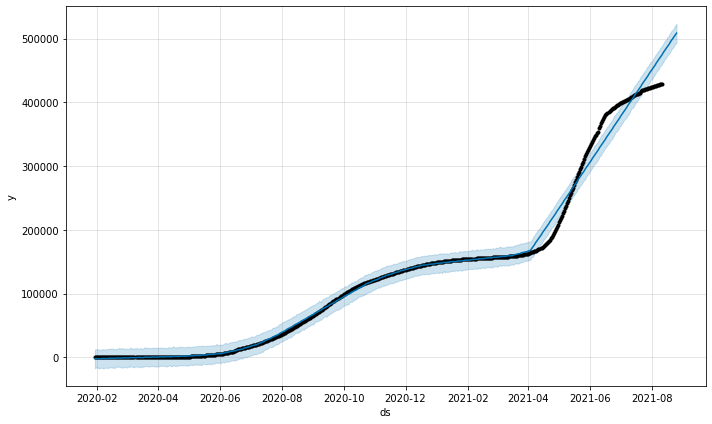

In [69]:
death_forecast_plot = model.plot(prediction)

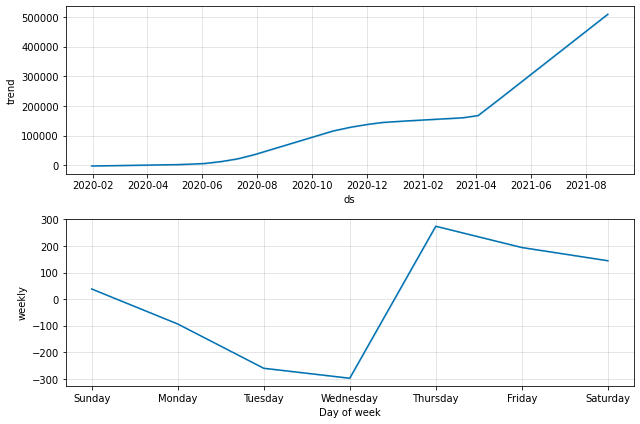

In [70]:
deaths_forecast_plot = model.plot_components(prediction)